In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

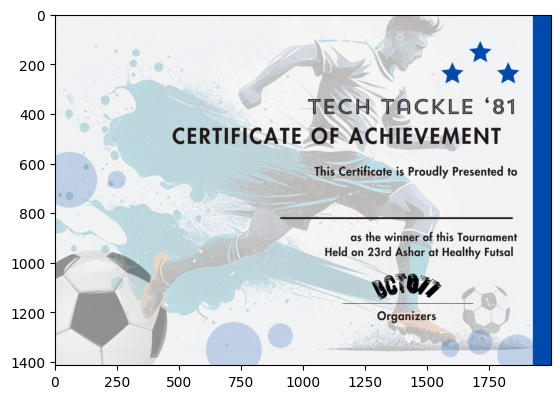

In [4]:
certificate=cv2.imread('win.png')
certificate=cv2.cvtColor(certificate,cv2.COLOR_BGR2RGB)
plt.imshow(certificate)
plt.show()

In [5]:
sift=cv2.SIFT_create()
sift.detect

<function SIFT.detect>

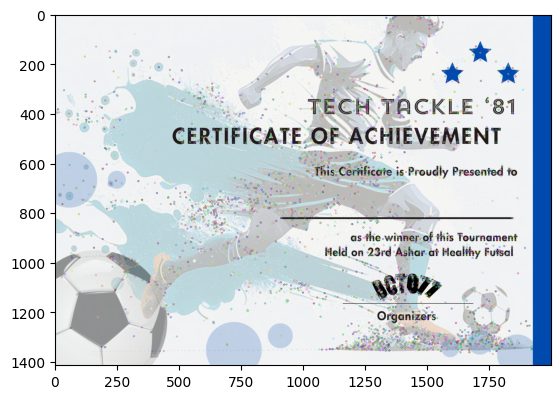

In [8]:
cert_kp,cert_desc=sift.detectAndCompute(certificate,None)
cert_kp_draw=cv2.drawKeypoints(certificate,cert_kp,None)
plt.imshow(cert_kp_draw)

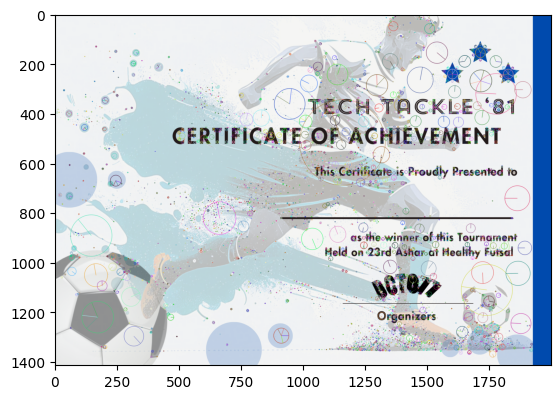

In [9]:
cert_kp,cert_desc=sift.detectAndCompute(certificate,None)
cert_kp_draw=cv2.drawKeypoints(certificate,cert_kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cert_kp_draw)

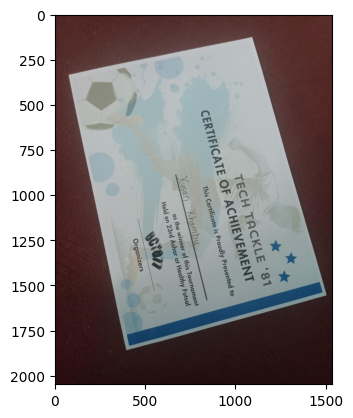

In [16]:
mero_cert=cv2.imread('kusan.jpg')
mero_cert=cv2.cvtColor(mero_cert,cv2.COLOR_BGR2RGB)
plt.imshow(mero_cert)

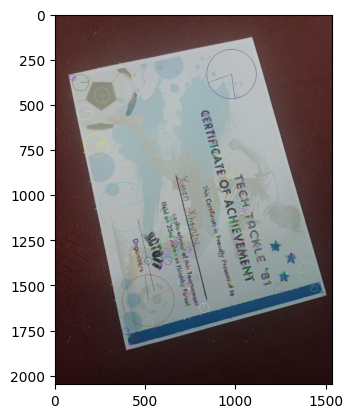

In [17]:
mero_kp,mero_desc=sift.detectAndCompute(mero_cert,None)
mero_kp_draw=cv2.drawKeypoints(mero_cert,mero_kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(mero_kp_draw)

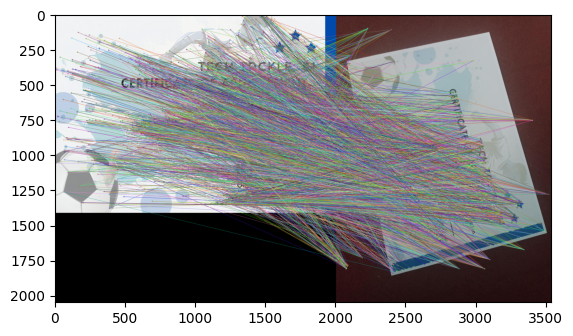

In [18]:
bf=cv2.BFMatcher_create()
matches=bf.match(cert_desc,mero_desc)
matches=sorted(matches,key=lambda x: x.distance)
matching_img=cv2.drawMatches(certificate,cert_kp,mero_cert,mero_kp,matches,None)
plt.imshow(matching_img)

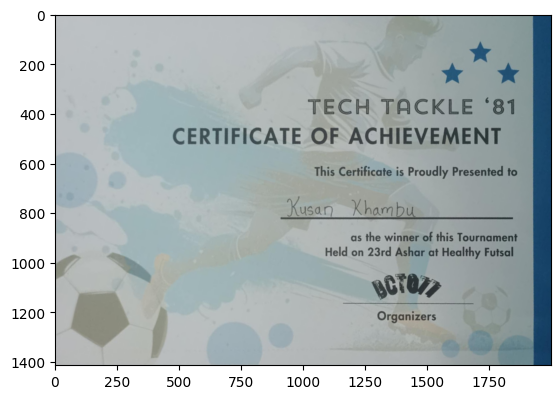

In [19]:
src_pts=np.float32([mero_kp[m.trainIdx].pt for m in matches[:50]]).reshape(-1,2)
dest_pts=np.float32([cert_kp[m.queryIdx].pt for m in matches[:50]]).reshape(-1,2)

M, _ =cv2.findHomography(src_pts,dest_pts,cv2.RANSAC,5.0)

h,w,_= certificate.shape
aligned_img=cv2.warpPerspective(mero_cert,M,(w,h))

plt.imshow(aligned_img)